# <font color=darkpink>Airbnb Berlin</font>

This script contains the following:
    
1. Import data and libraries


2. Data wrangling


3. Data cleaning


4. Plotting a choropleth


5. Export data


** **

## 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".json" file for Berlin

berlin = r'/Users/berk/Airbnb_Berlin/Data/Original_Data/berlin_neighborhoods.geojson'

In [4]:
path = r'/Users/berk/Airbnb_Berlin'

In [5]:
# Import data

df_list = pd.read_csv(os.path.join(path, 'Data', 'Prepared_Data', 'list_cleaned_2.csv'), index_col = False)

In [6]:
df_list.head()

,Unnamed: 0,listing_id,listing_name,host_id,host_name,district,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_total_listings,availability_365,review_in_the_last_year,license,price_category
0,0,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,83,63,147,2021-01-01,0.88,1,303,0,First name and Last name: Nicolas Krotz Conta...,middle_price
1,1,251423,2-room I 50 m² I Comfort I Balcony,1023063,Raja Jooseppi,Mitte,Brunnenstr. Nord,52.53867,13.39712,Entire home/apt,100,3,14,2023-01-29,0.11,8,93,10,01/Z/NA/003420-15,middle_price
2,2,9991,Geourgeous flat - outstanding views,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53269,13.41805,Entire home/apt,180,6,8,2020-01-04,0.09,1,0,0,03/Z/RA/003410-18,high_price
3,3,251486,I 2 Room I 41 m² I Balcony,1023063,Raja Jooseppi,Mitte,Brunnenstr. Süd,52.53667,13.39505,Entire home/apt,108,3,31,2023-03-14,0.24,8,104,28,01/Z/ZA/006181-16,middle_price
4,4,251493,2-room I 41 m² I Terrace > Mitte,1023063,Raja Jooseppi,Mitte,Brunnenstr. Nord,52.53881,13.39654,Entire home/apt,98,3,15,2023-02-26,0.12,8,98,13,01/Z/ZA/006180-16,middle_price


In [7]:
df_list.shape

(6065, 20)

## 2. Data wrangling

In [8]:
# Check the unique district of Berlin

df_list.district.unique()

array(['Pankow', 'Mitte', 'Friedrichshain-Kreuzberg',
       'Tempelhof - Schöneberg', 'Treptow - Köpenick',
       'Charlottenburg-Wilm.', 'Neukölln', 'Lichtenberg',
       'Marzahn - Hellersdorf', 'Steglitz - Zehlendorf', 'Spandau',
       'Reinickendorf'], dtype=object)

In [9]:
type(df_list)

pandas.core.frame.DataFrame

In [10]:
# Remove the space to align the district names with json names

df_list.district = df_list.district.str.replace(" ", "")

In [11]:
# Change the name of district to align with json name

df_list['district'].replace('Charlottenburg-Wilm.', 'Charlottenburg-Wilmersdorf', inplace=True)

In [12]:
# Check the unique district of Berlin

df_list.district.unique()

array(['Pankow', 'Mitte', 'Friedrichshain-Kreuzberg',
       'Tempelhof-Schöneberg', 'Treptow-Köpenick',
       'Charlottenburg-Wilmersdorf', 'Neukölln', 'Lichtenberg',
       'Marzahn-Hellersdorf', 'Steglitz-Zehlendorf', 'Spandau',
       'Reinickendorf'], dtype=object)

## 3. Data cleaning 

In [13]:
# Check for missing values

df_list.isnull().sum() 

Unnamed: 0                 0
listing_id                 0
listing_name               0
host_id                    0
host_name                  0
district                   0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
number_of_reviews          0
last_review                0
reviews_per_month          0
host_total_listings        0
availability_365           0
review_in_the_last_year    0
license                    0
price_category             0
dtype: int64

In [14]:
# Remove 'Unnamed' column as it is irrelevant for analysis

df_list = df_list.drop("Unnamed: 0", axis=1)

In [15]:
# Run a check for duplicate values in the data

df_list_dups = df_list[df_list.duplicated()]

In [16]:
df_list_dups.size

0

In [17]:
df_list.shape

(6065, 19)

<AxesSubplot:xlabel='price', ylabel='Count'>

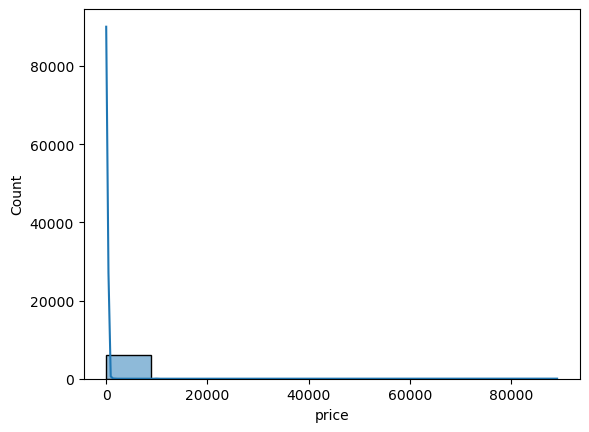

In [18]:
# Check the extreme value of price

sns.histplot(df_list['price'], bins = 10, kde = True)

In [19]:
# Check how many extreme values

df_list[df_list['price'] > 10000]

,listing_id,listing_name,host_id,host_name,district,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_total_listings,availability_365,review_in_the_last_year,license,price_category
94,229363,Excl. Studio B Mitte/Hansaviertel,1195177,Annika,Mitte,Moabit Ost,52.521477,13.342496,Entire home/apt,89105,5,72,2021-10-16,0.57,2,268,0,01/Z/NA/004722-16,high_price


In [20]:
# Remove extreme values greater than 10000

df_list = df_list[df_list['price'] < 10000] 
df_list.shape

(6064, 19)

<AxesSubplot:xlabel='minimum_nights', ylabel='Count'>

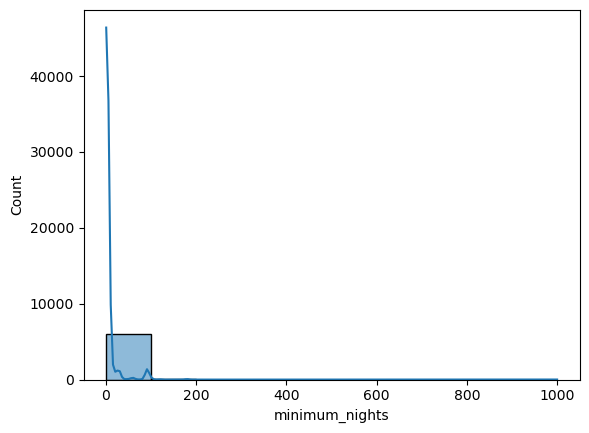

In [21]:
# Check the minimun_nights variable

sns.histplot(df_list['minimum_nights'], bins = 10, kde = True)

In [22]:
# Check how many extreme values

df_list[df_list['minimum_nights'] > 999]

,listing_id,listing_name,host_id,host_name,district,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_total_listings,availability_365,review_in_the_last_year,license,price_category
1385,17836549,Cozy room in spacious flat with kitten,9194512,Joy,Neukölln,Neuköllner Mitte/Zentrum,52.48168,13.43286,Private room,45,1000,18,2021-04-28,0.25,3,0,0,08/Z/AZ/006241-18,low_price


In [23]:
# Remove extreme values greater than 10000

df_list = df_list[df_list['minimum_nights'] < 999] 
df_list.shape

(6063, 19)

## 4. Plotting a choropleth

In [24]:
# Create a data frame with just the district and the price 

data_to_plot = df_list[['district','price']]
data_to_plot.head()

,district,price
0,Pankow,83
1,Mitte,100
2,Pankow,180
3,Mitte,108
4,Mitte,98


In [25]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [52.5, 13.4], zoom_start = 9)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = berlin, 
    data = data_to_plot,
    columns = ['district', 'price'],
    key_on = 'feature.properties.spatial_alias', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Average Price").add_to(map)
folium.LayerControl().add_to(map)

map

In [26]:
map.save('plot_data.html')

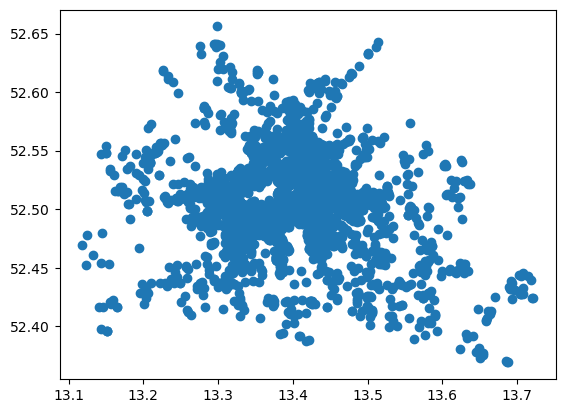

In [27]:
import matplotlib.pyplot as plt

plt.scatter(x = df_list['longitude'], y = df_list['latitude'])
plt.show()

In addition to the aforementioned heat map, I have also created a plot map to enhance the level of detail regarding the rental properties and their potential higher prices. By incorporating this plot map, we can delve deeper into the analysis and gain a more comprehensive understanding of the rental market.

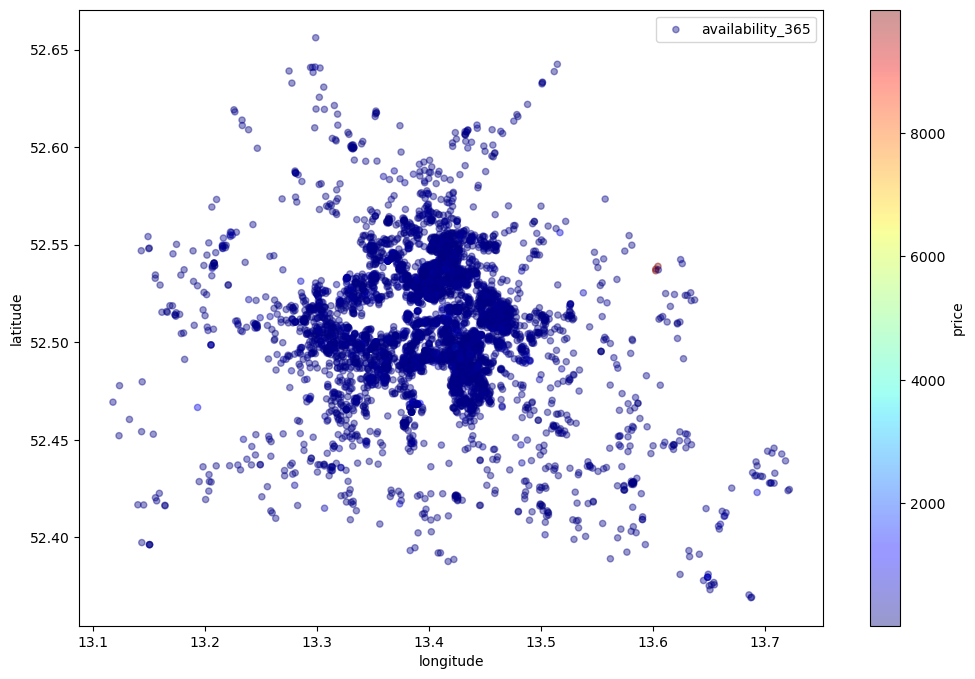

In [28]:
heat_365 = df_list.plot(kind ='scatter', x = 'longitude', y = 'latitude', label = 'availability_365', c= 'price',
                  cmap = plt.get_cmap('jet'), colorbar = True, alpha = 0.4, figsize = (12,8))


Without a map as a visual reference, it may be challenging for the average reader to interpret the specific details presented. However, upon comparing the plot map with the JSON map, a distinct pattern emerges. It becomes evident that there is a notable clustering of higher-priced rental properties, accompanied by consistently high availability throughout the year. These concentrated areas predominantly align with the city center, which is a common characteristic of metropolitan regions such as Berlin.

The rental landscape in this area is characterized by a diverse range of prices and year-round availability. However, there are a few notable gaps that stand out. One such void is caused by the presence of a former airport, now transformed into a park, right in the heart of the city center. Despite its central location, no rentals are offered in this particular space. Another empty area that stands out is the expansive Tiergarten, a renowned city park situated in the heart of former West Berlin. Surprisingly, this centrally located park does not accommodate any rental options, leaving it as a peaceful oasis amidst the bustling city center.

## 5. Export data

In [29]:
# Export df_list

df_list.to_csv(os.path.join(path, 'Data','Prepared_Data', 'list_cleaned_3.csv'))